Linear Algebra with PyTorch Tensors

In [2]:
import torch
import matplotlib.pyplot as plt

Vectors definition and operations (remember: vectors are tensors of dimension 1)

In [3]:
v1 = torch.tensor([1.0, 2.0, 3.0])
v2 = torch.tensor([4.0, 5.0, 6.0])

# Vector addition
v_sum = v1 + v2
#print(v_sum)

# Scalar multiplication
scalar = 2.0
v_scaled = scalar * v1
#print(v_scaled)

# Dot product
dot_product = torch.dot(v1, v2)
#print(dot_product)

# Outer product
outer_product = torch.outer(v1, v2)
#print(outer_product)
outer_product = torch.outer(v2, v1)
#print(outer_product)

# Vector multiplication (element-wise or Hadamard product)
had_product1 = v1*v2
#print(had_product1)

# mul: tensor element-wise product operator
# https://docs.pytorch.org/docs/stable/generated/torch.mul.html#torch.mul
had_product2 = torch.mul(v1,v2) # tensor element-wise product operator (also works with matrices)
#print(had_product2)

# mul also performs scalar multiplication
v_scaled2 = torch.mul(scalar,v1)
#print(v_scaled2)

# matmul (dot product)
#v_matmul = torch.matmul(v1, v2)
v_matmul = torch.matmul(v2, v1)
#print(v_matmul)
# transpose testing
#v1_t = torch.transpose(v1,-1,0)
#print(v1_t)
#print(v1_t + v2)


Matrices definition and operations (matrices are tensors of dimension 2)

In [4]:
M1 = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
M2 = torch.tensor([[5.0, 6.0], [7.0, 8.0]])

# Matrix addition
M_sum = M1 + M2
#print(M_sum)

# Matrix multiplication (element-wise or Hadamard product)
M_element_wise_mul1 = M1 * M2
M_element_wise_mul2 = torch.mul(M1,M2) # = torch.mul(M2,M1)
#print(M_element_wise_mul1)
#print(M_element_wise_mul2)

# Matrix multiplication (dot product). It also works for vectors (see above)
# For M1 (2x2) and M2 (2x2), the result is 2x2
# matmul: matrix product of two tensors (more general function)
# https://docs.pytorch.org/docs/stable/generated/torch.matmul.html#torch-matmul
M_matmul = torch.matmul(M1, M2)
#print(M_matmul)
M_matmul = torch.matmul(M2, M1)
#print(M_matmul)

# mm: matrix multiplication of matrices (this function does not broadcast)
# https://docs.pytorch.org/docs/stable/generated/torch.mm.html#torch.mm
# about broadcast: https://numpy.org/doc/stable/user/basics.broadcasting.html
M_matmul = torch.mm(M1, M2)
#print(M_matmul)
M_matmul = torch.mm(M2, M1)
#print(M_matmul)

# Matrix-vector multiplication
# M1 (2x2) and v1 (reshaped to 2x1 for this example, though PyTorch can broadcast)
# Let's define a compatible vector
# mv: performs a matrix-vector product (this function does not broadcast)
# https://docs.pytorch.org/docs/stable/generated/torch.mv.html#torch.mv
v_compatible = torch.tensor([1.0, 2.0]) # 2 elements for a 2x2 matrix
Mv_product = torch.mv(M1, v_compatible)
#print(v_compatible)
#print(Mv_product)

# some information: https://medium.com/@benjybo7/6-ways-to-multiply-tensors-in-pytorch-7cd6485ecb7b

Simulating neuron computation $A*x+b$. Let's consider two neurons with different weights each

In [5]:
x = torch.tensor([0.5, 1.0, -0.2])      # Inputs (e.g., 3 features for one sample)
A = torch.tensor([[0.7, -0.3, 0.1],     # Weights for neuron 1 (from a previous training)
                  [0.2,  0.4, -0.5]])   # Weights for neuron 2 (from a previous training)
b = torch.tensor([0.1, -0.2])           # Biases for 2 neurons
z = torch.mv(A, x) + b # Weighted sum: z = Wx + b
#print(z)

Now, compute $F(A*x+b)$ element-wise (i.e., each neuron performs its own activate function)

In [6]:
F_relu=torch.relu(z)
F_sigmoid=torch.sigmoid(z)
#print(F_relu)
#print(F_sigmoid)
F_neuron1=torch.relu(z[0])
F_neuron2=torch.sigmoid(z[1])
#print(F_neuron1)
#print(F_neuron2)

Plot activation functions to illustrate

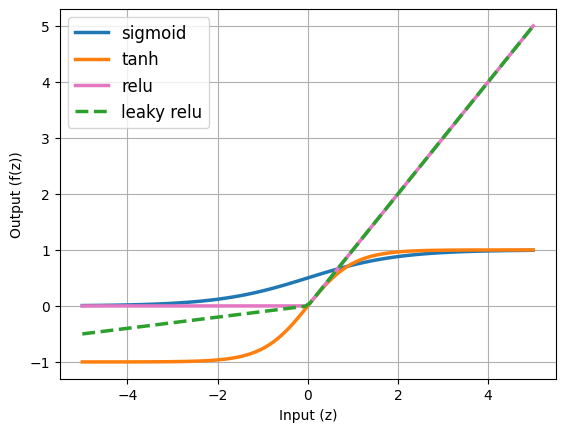

In [7]:
x_range=(-5, 5)
x = torch.linspace(x_range[0], x_range[1], 100)
#print(x)

y_sigmoid = torch.sigmoid(x)

y_tanh = torch.tanh(x)

y_relu = torch.relu(x)
#print(y_relu)
f_leaky_relu = torch.nn.LeakyReLU(negative_slope=0.1)
y_leaky_relu = f_leaky_relu(x)
#print(y_leaky_relu)

plt.plot(x.numpy(), y_sigmoid.numpy(),label='sigmoid',linewidth=2.5)
plt.plot(x.numpy(), y_tanh.numpy(),label='tanh',linewidth=2.5)
plt.plot(x.numpy(), y_relu.numpy(),label='relu',linewidth=2.5,color='C6')
plt.plot(x.numpy(), y_leaky_relu.numpy(),label='leaky relu',linewidth=2.5,linestyle='--')
plt.xlabel("Input (z)")
plt.ylabel("Output (f(z))")
plt.grid(True)
plt.legend(fontsize="12")
plt.show()

In [8]:
a=torch.tensor(1)
#a=torch.tensor([1])
#a=torch.tensor([[1.]])
print("a = ")
print(a)
print("dim(a) = "+str(a.dim()))
print("shape(a) ="+str(a.shape))
print("type(a) = "+str(type(a))) # returns the class
print("dtype(a) = "+str(a.dtype)) # returns the data type (float32, float64, etc)
a.item()

a = 
tensor(1)
dim(a) = 0
shape(a) =torch.Size([])
type(a) = <class 'torch.Tensor'>
dtype(a) = torch.int64


1

In [9]:
a=torch.tensor([[1,-1],[1,-1]])
print("a = ")
print(a)
print("dim(a) = "+str(a.dim()))
print("shape(a) ="+str(a.shape))
print("type(a) = "+str(type(a)))
print("dtype(a) = "+str(a.dtype))

a = 
tensor([[ 1, -1],
        [ 1, -1]])
dim(a) = 2
shape(a) =torch.Size([2, 2])
type(a) = <class 'torch.Tensor'>
dtype(a) = torch.int64


In [10]:
a=torch.zeros([2,4],dtype=torch.int32)
#a=torch.zeros([2,4,3],dtype=torch.int32) # dimension?
print("a = ")
print(a)
print("dim(a) = "+str(a.dim()))
print("shape(a) ="+str(a.shape))
print("type(a) = "+str(type(a)))
print("dtype(a) = "+str(a.dtype))

a = 
tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)
dim(a) = 2
shape(a) =torch.Size([2, 4])
type(a) = <class 'torch.Tensor'>
dtype(a) = torch.int32


In [11]:
#a=torch.ones(2,3)
a=torch.rand(2,3) #random numbers (0-1)
print("a = ")
print(a)
print("dim(a) = "+str(a.dim()))
print("shape(a) ="+str(a.shape))
print("type(a) = "+str(type(a)))
print("dtype(a) = "+str(a.dtype))

a = 
tensor([[0.8171, 0.3954, 0.2965],
        [0.0071, 0.7982, 0.1847]])
dim(a) = 2
shape(a) =torch.Size([2, 3])
type(a) = <class 'torch.Tensor'>
dtype(a) = torch.float32
